<h1><center>Inverting the Pyramid back !!!</center></h1>
**Project by - _Archit Singh_, _Shubham Sharma_, _Aditya Sahay_**<br>
**Class: EAS503**<br>
**Program: Engineering Science (Data Sciences)**<br>


### Project Description and impact on community

* Description - Analysis of in-match football data to:<br>
 1. Glean out non-intuitive insights<br>
 2. present highlights and lowlights of the tournament<br>
 3. Come up with intereseting metrics to determine team's and player's performance<br>
 

* Why? - Most of the analysis that you see on the internet gives us a superficial view of what happened in the tournament therefore leaving many unusual trends hidden and questions unanswered. This analysis goes beyond such works and unlocks the hidden trends in order to help us understand the strategies and their impact.


* Impact on sports and entertainment community:<br>
 1. Helps football clubs make decisions based on the world cup performance of players.<br>
 2. If built on a more comprehensive data set it can be used by teams to devise strategies based on the opponents.<br>
 3. Can help football clubs save big on scouts and pick out players who aren't visible to naked eyes. <br>
 

* The Data - The data has been taken from 'Statsbomb.com' - a football analytics firm run by Ted Knutson. Data is a stream of events occuring at second level for any given match<br>
Link: https://github.com/statsbomb/open-data/tree/master/data

All our analysis has been compiled in a Dashboard using Plotly.
Link: https://plot.ly/dashboard/asahay:16/view


#### Data Conversion: JSON to CSV

```
var jc = require("json2csv");
var fs = require("fs");

var ls = fs.readdirSync("./");

var files = ls.filter(function(filename) {
    return filename.match(/^[0-9]+.json/) !== null;
});

var full = [];

var data = null;
for (var file of files) {
    data = fs.readFileSync(file);
    data = JSON.parse(data);

    for (var i = 0; i < data.length; i++)
        data[i]["match_id"] = file.substring(0, file.indexOf("."));

    full = full.concat(data);
    console.log("Finished reading: " + file);
}

console.log("Total rows: " + full.length);

var csv;

var columns = [
    "match_id",
    "id",
    "index",
    "period",
    "timestamp",
    "type.name",
    "possession",
    "possession_team.name",
    "play_pattern.name",
    "team.name",
    "duration",
    "related_events.0",
    "player.name",
    "position.name",
    "location.0",
    "location.1",
    "pass.recipient.id",
    "pass.recipient.name",
    "pass.length",
    "pass.angle",
    "pass.height.id",
    "pass.height.name",
    {
        label: "pass.end_location.0",
        value: "pass.end_location[0]"
    },
    {
        label: "pass.end_location.1",
        value: "pass.end_location[1]"
    },
    "pass.type.id",
    "pass.type.name",
    "under_pressure",
    "pass.aerial_won",
    "duel.type.id",
    "duel.type.name",
    "duel.outcome.id",
    "duel.outcome.name",
    "interception.outcome.id",
    "interception.outcome.name",
    "pass.switch",
    "pass.cross",
    "dribble.outcome.id",
    "dribble.outcome.nam",
    "foul_committed.type.id",
    "foul_committed.type.name",
    "clearance.aerial_won",
    "ball_recovery.recovery_failure",
    "foul_committed.advantage",
    "foul_won.advantage",
    "pass.assisted_shot_id",
    "pass.shot_assist",
    "shot.statsbomb_xg",
    {
        label: "shot.end_location.0",
        value: "shot.end_location[0]"
    },
    {
        label: "shot.end_location.1",
        value: "shot.end_location.1"
    },
    {
        label: "shot.end_location.2",
        value: "shot.end_location[2]"
    },
    "shot.body_part.id",
    "shot.body_part.name",
    "shot.outcome.id",
    "shot.outcome.name",
    "shot.type.id",
    "shot.type.name",
    {
        label: "shot.freeze_frame.0.location.0",
        value: "shot.freeze_frame[0].location[0]"
    },
    {
        label: "shot.freeze_frame.0.location.1",
        value: "shot.freeze_frame[0].location[1]"
    },
    "foul_committed.card.id",
    "foul_committed.card.name",
    "pass.goal_assist",
    "block.deflection",
    "foul_committed.penalty",
    "shot.one_on_one",
    "shot.open_goal",
];

try {
    console.log("Converting combined data to CSV...");
    csv = jc.parse(full, {
        fields: columns
    });
    console.log("Finished converting to CSV.");
} catch (err) {
    console.log("Error: " + err);
}

console.log("Writing to output file...");
fs.writeFileSync("out.csv", csv);
console.log("Finished writing to output file.");
```

### Data Manipulation in MySQL

```
Use soccer;

drop table team_1_value;
Create table team_1_value as(
select Nationality as team,sum(Overall) value from sofifa group by 1);

# Chart 1: team ranking intermediate
drop table team_1_results;
Create table team_1_results as(
select a.*,home_score-away_score as home_gd,away_score-home_score as away_gd,
case when home_score>away_score then 3
when home_score<away_score then 0
when home_score=away_score then 1 end as home_points,
case when away_score>home_score then 3
when away_Score<home_score then 0
when away_Score=home_score then 1 end as away_points from matches a);

drop table team_1_home;
Create table team_1_home as(
(select match_id,match_date,`home_team.home_team_name` as team,home_points points,home_gd gd from team_1_results) union 
(select match_id,match_date,`away_team.away_team_name` as team,away_points points,away_gd gd from team_1_results) );

# Rank table
drop table team_1_rank_notopas ;
create table team_1_rank_notopas as(
select team,pnts,gds,rank() over(order by pnts DESC,gds DESC)+2 ranks from
(select team,sum(points) as pnts,sum(gd) gds from team_1_home group by 1) a
where team!='Croatia' and team!='France') ;

insert into team_1_rank_notopas values
('Croatia',14,5,2);
insert into team_1_rank_notopas values
('France',19,8,1);

#chart 1 rank table final
select * from team_1_rank_notopas;

create table team_1_rank_value as(
select a.*,b.value from team_1_rank_notopas a left join team_1_value b on a.team=b.team);

# Prev rank
# Create table sys.prev_ranks as(select * from database.prev_ranks);

Create table team_1_rank_value_prev as(
select a.*,b.rank as prev_rank from team_1_rank_value a left join prev_ranks b on a.team=b.team);

# Chart 1 final table
select * from team_1_rank_value_prev;

# Team chart 2
drop table team_2_points ;
create table team_2_points as(
select team,match_id,RANK( ) OVER (PARTITION BY team ORDER by match_id) as rnk,points as points,gd as gd
 from team_1_home);
 
# Team chart 2 final table
select* from team_2_points;

## Chart 3 - Attack

create table team_3_attack1 as(
((select match_id,`home_team.home_team_name` as team_name,home_score as score from matches) union
(select match_id,`away_team.away_team_name` as team_name,away_score as score from matches)));

create table team_3_attack3 as(
select team_name,avg(score) as avg_score from team_3_attack1 group by team_name);

select * from team_3_attack3;

## xg
create table team_3_attack4 as(
select `team.name` as team_name,avg(round(`shot.statsbomb_xg`,2)) avg_xg from events 
where `type.name`='shot' group by 1);

select * from team_3_attack4;

## Shots
drop table team_3_attack5 ;
create table team_3_attack5 as(
select match_id,`possession_team.name` as team_name,count(*) as shots
from events where `type.name`='shot' group by 1,2);

select *from team_3_attack5;

create table team_3_attack8 as(
select team_name,avg(shots) shots from team_3_attack5 group by 1);

select * from team_3_attack8;

## Successful Dribbles
create table team_3_attack6 as(
select match_id,`possession_team.name` as team_name,count(*) as dribbles from events where `dribble.outcome.id`=8
group by 1,2);

create table team_3_attack7 as(
select team_name,avg(dribbles) dribbles from team_3_attack6 group by 1);

select * from team_3_attack7;

drop table team_3_attack9 ;
Create table team_3_attack9 as(
select a.*,b.avg_xg,b.shots from team_3_attack3 a left join 
(select a.*,b.shots from team_3_attack4 a left join team_3_attack8 b on a.team_name=b.team_name) b on
a.team_name=b.team_name group by 1,2,3,4);

drop table team_3_attack10 ;
create table team_3_attack10 as(
select a.*,b.dribbles from team_3_attack9 a left join team_3_attack7 b on a.team_name=b.team_name);

# Final attack#################
select * from team_3_attack10;
###############################

## Chart 3 - defense

## Goals conceded

create table team_3_defense1 as(
((select match_id,`home_team.home_team_name` as team_name,away_score as conceded from matches) union
(select match_id,`away_team.away_team_name` as team_name,home_score as conceded from matches)));

create table team_3_defense2 as(
select team_name,avg(conceded) as conceded from team_3_defense1 group by 1);

select * from team_3_defense2;

## Saves

drop table team_3_defense3 ;
create table team_3_defense3 as(
select match_id,`team.name` as team_name, count(*) as saves from events where `related_events.0` in (select id from events where
`type.name` = 'Shot' and `shot.outcome.name`='Saved' group by 1) group by 1,2);

select * from team_3_defense3;

create table team_3_defense33 as(
select team_name,avg(saves) as saves from team_3_defense3 group by 1);

## Blocks
drop table team_3_defense4 ;
create table team_3_defense4 as(
select match_id,`team.name` as team_name, count(*) as blocks from events where `type.name`='Block' group by 1,2);

create table team_3_defense44 as(
select team_name,avg(blocks) as blocks from team_3_defense4 group by 1);

select * from team_3_defense4;

drop table team_3_defense5 ;
Create table team_3_defense5 as(
select a.*,b.saves,b.blocks from team_3_defense2 a left join 
(select a.*,b.blocks from team_3_defense33 a left join team_3_defense44 b on a.team_name=b.team_name) b on
a.team_name=b.team_name group by 1,2,3,4);

######Final table Defense##########
select * from team_3_defense5;
###################################

## Chart 3 - Midfield

## Possession

drop table team_3_mids1 ;
create table team_3_mids1 as(
select match_id,`possession_team.name` as team_name,sum(duration) dur from events group by 1,2);
select *,sum(dur) from team_3_mids1 group by 1 limit 10;
# drop table team_3_mid1 ;
# create table team_3_mid1 as(
# select match_id,timestamp,possession,`possession_team.name` as tn, rank() over(partition by match_id,
# `possession_team.name`,possession order by timestamp) ranks 
# from events group by 1,2,3,4);

# select * from team_3_mid1 where match_id=7525;

# create table team_3_mid2 as(
# select a.match_id,a.possession,a.tn as team_name,a.timestamp-b.timestamp as diff from team_3_mid1 a left join 
# team_3_mid1 b on a.ranks=b.ranks+1 and a.match_id=b.match_id and a.tn=b.tn);

# select count(*) from team_3_mid2 limit 20;
drop table team_3_mids2 ;
create table team_3_mids2 as(
select a.*, b.total,round((a.dur/b.total)*100) as possession 
from team_3_mids1 a left join (select *,sum(dur) total from team_3_mids1 group by 1)
b on a.match_id=b.match_id);

create table team_3_mids3 as(
select team_name,avg(possession) as poss from team_3_mids2 group by team_name);

## Pass
drop table team_3_mids4 ;
create table team_3_mids4 as(
select match_id,`possession_team.name` as team_name,count(*) as passes
from events where `type.name` ='Pass' group by 1,2);

create table team_3_mids5 as(
select team_name,avg(passes) as passes from team_3_mids4  group by 1);

select * from team_3_mids5;
create table sys.team_3_mids6 as (select * from root.passacc);

select * from team_3_mids6 ;
Update `team_3_mids6` set `team_name`='Colombia' where `team_name`='Columbia';

## Final table
drop table team_3_mids7 ;
Create table team_3_mids7 as(
select a.*,b.pass_acc,b.passes from team_3_mids3 a left join (select a.*,b.pass_acc from team_3_mids5 a
left join team_3_mids6 b on a.team_name=b.team_name) b on a.team_name=b.team_name);

## Final mid ################
select * from team_3_mids7;
#############################

drop table player_class1;
create table player_class1 as(
select `player.name` as player,`position.name` as position,count(*) as times from events group by 1,2);

drop table player_class2 ;
create table player_class2 as(
select player,position,rank() over(partition by player order by times desc) as ranks from player_class1);
delete from player_class2 where player='';

Create table player_class3 as(
select player,position from player_class2 where ranks=1 group by 1,2);

drop table player_1_value;
Create table player_1_value as(
select player as team,sum(Overall) value from sofifa group by 1);

select * from sofifa1 limit 10;

##Attackers

drop table player_1_attack1 ;
Create table player_1_attack1 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as goals
from events where `shot.outcome.name`='Goal' and `shot.type.name`='Open Play' and `player.name` in 
(select player from player_class3 where position in 
('Center Forward',
'Center Attacking Midfield',
'Left Center Forward',
'Right Center Forward',
'Right Wing',
'Left Wing',
'Secondary Striker',
'Left Attacking Midfield',
'Right Attacking Midfield')) group by 1,2,3);

drop table player_1_attack11 ;
create table player_1_attack11 as(
select a.team_name,a.player,round(sum(a.goals),2) as goals from player_1_attack1 a group by a.team_name,a.player);

select * from player_1_attack12 where player like '%Cahil%';

drop table player_1_attack12 ;
Create table player_1_attack12 as(
select `team.name` as team_name,`player.name` as player,count(distinct match_id) as matches 
from events where 
`player.name` in 
(select player from player_class3) group by 1,2);

drop table player_1_attack13 ;
create table player_1_attack13 as(
select a.team_name,a.player,a.goals,b.matches,round((goals/matches),2) as goalspm from player_1_attack11 a left join 
player_1_attack12 b on a.team_name=b.team_name and a.player=b.player);

select * from player_1_attack13;

## Shots

drop table player_1_attack2 ;
create table player_1_attack2 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as shots,
avg(round((`shot.statsbomb_xg`),2)) as diff from events where `type.name`='Shot'
and `player.name` in 
(select player from player_class3 where position in 
('Center Forward',
'Center Attacking Midfield',
'Left Center Forward',
'Right Center Forward',
'Right Wing',
'Left Wing',
'Secondary Striker',
'Left Attacking Midfield',
'Right Attacking Midfield')) group by 1,2,3);

drop table player_1_attack22;
create table player_1_attack22 as(
select a.team_name,a.player,round(sum(a.shots),2) as shots,round(sum(a.diff),2) as diff
from player_1_attack2 a group by a.team_name,a.player);

drop table player_1_attack24 ;
create table player_1_attack24 as(
select a.team_name,a.player,a.shots,a.diff,b.matches,round((shots/matches),2) as shotspm 
,round((diff/matches),2) as diffpm from player_1_attack22 a left join 
player_1_attack12 b on a.team_name=b.team_name and a.player=b.player);

select * from player_1_attack24;

select CAST(`shot.end_location.2` as unsigned) from events group by 1;
select * from player_1_attack3;
### Shots on target
drop table player_1_attack3 ;
create table player_1_attack3 as(
select  match_id,`team.name` as team_name,`player.name` as player,count(*) as sot
from events where 
`shot.end_location.0`!='' and `shot.end_location.1`!='' and CAST(`shot.end_location.1` as unsigned)>=36 
and  CAST(`shot.end_location.1` as unsigned)<=43 and CAST(`shot.end_location.0` as unsigned)>=114 and
CAST(`shot.end_location.2` as unsigned)<3
and `type.name`='Shot'
and `player.name` in 
(select player from player_class3 where position in 
('Center Forward',
'Center Attacking Midfield',
'Left Center Forward',
'Right Center Forward',
'Right Wing',
'Left Wing',
'Secondary Striker',
'Left Attacking Midfield',
'Right Attacking Midfield')) group by 1,2,3);

select * from player_1_attack3;

drop table player_1_attack33 ;
create table player_1_attack33 as(
select a.team_name,a.player,round(sum(a.sot),2) as sot
from player_1_attack3 a group by a.team_name,a.player);

drop table player_1_attack34 ;
create table player_1_attack34 as(
select a.team_name,a.player,a.sot,b.matches,round((sot/matches),2) as sotpm 
from player_1_attack33 a left join 
player_1_attack12 b on a.team_name=b.team_name and a.player=b.player);

select * from player_1_attack34;

drop table player_1_attack4 ;
create table player_1_attack4 as(
select a.*,b.goalspm as goals,b.sotpm as sot from player_1_attack24 a left join 
(select a.*,b.sotpm from player_1_attack13 a left join
player_1_attack34 b on a.team_name=b.team_name and a.player=b.player) b on 
a.team_name=b.team_name and a.player=b.player);

select * from player_1_attack4;

drop table player_1_attack5 ;
create table player_1_attack5 as(
select team_name,player,shotspm as shots,diffpm as diff,goals,sot,round(goals/shots,2) as scoring_ratio from player_1_attack4);

## Final attack table
select * from player_1_attack5;

## Midfield
drop table player_3_mid1;

create table player_3_mid1 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as passes from events
where `type.name`='Pass' 
and `player.name` in 
(select player from player_class3 where position in 
('Center Defensive Midfield',
'Left Center Midfield',
'Left Midfield',
'Right Midfield',
'Right Center Midfield',
'Left Defensive Midfield',
'Right Defensive Midfield',
'Center Midfield')) group by 1,2,3);
select * from player_3_mid1;

drop table player_3_mid2 ;
create table player_3_mid2 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as disp from events where 
`type.name`='Dispossessed' 
and `player.name` in 
(select player from player_class3 where position in 
('Center Defensive Midfield',
'Left Center Midfield',
'Left Midfield',
'Right Midfield',
'Right Center Midfield',
'Left Defensive Midfield',
'Right Defensive Midfield',
'Center Midfield')) group by 1,2,3);

select count(*) from player_3_mid1;

drop table player_3_mid4;
create table player_3_mid4 as(
select a.*,b.disp from player_3_mid1 a left join player_3_mid2 b on a.match_id=b.match_id
and a.team_name=b.team_name and a.player=b.player);

select * from player_3_mid4 where player like '%Luka %';
drop table player_3_mid5;
create table player_3_mid5 as(
select team_name,player,round(avg(passes)) as passes,round(avg(disp),2) as disp from player_3_mid4 group by match_id);

Update player_3_mid4 set disp=0 where disp is null;

## Final mid table #############
select * from player_3_mid5;
################################

drop table player_3_mid6 ;
create table player_3_mid6 as(
select match_id,`team.name` as team_name,`player.name` as player,`location.0` as location0,`location.1` as location1,
rank() over(partition by match_id,`player.name` order by timestamp) ranks from events where
`player.name`!='' and `location.0`!=0 and `player.name` in (select `player.name` from player_class3 where position in 
('Center Defensive Midfield',
'Left Center Midfield',
'Left Midfield',
'Right Midfield',
'Right Center Midfield',
'Left Defensive Midfield',
'Right Defensive Midfield',
'Center Midfield')));

select * from player_3_mid7 where player like '%Luka Mo%' ;

create table player_3_mid7 as(
select a.*,b.matches from player_3_mid6 a left join
(select `team.name` as team_name,count(distinct match_id) as matches from events group by 1)
b on a.team_name=b.team_name);

select * from player_3_mid8 limit 11;

create table player_3_mid8 as(
select * from player_3_mid7 where matches>3);

create table player_3_mid9 as(
select a.*,b.location0 as location2,b.location1 as location3 from player_3_mid8 a left join player_3_mid8 b 
on a.match_id=b.match_id and a.player=b.player where a.ranks =b.ranks+1);

drop table player_3_mid10 ;
create table player_3_mid11 as(
select player,location0,location1,count(*) as events from player_3_mid8 group by 1,2,3);

create table player_3_mid12 as(
select match_id,team_name,player,sum(sqrt(POWER((location0 - location2),2) + POWER((location1 - location3),2 )))*0.00091 as dist
from player_3_mid9 group by 1,2,3);

drop table player_3_mid_final ;
create table player_3_mid_final as(
select a.*,b.dist from player_3_mid5 a left join
(select team_name,player,round(sum(dist)*2.8,2) as dist from player_3_mid12 group by 1,2) b 
on a.team_name=b.team_name and a.player=b.player group by 1,2);

### Final final mid table###########
select * from player_3_mid_final;
####################################

select team_name,player,round(sum(dist)*2.8,2) as dist from player_3_mid12 group by 1,2;

## Defense

drop table player_2_def1 ;
create table player_2_def1 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as duels_won from events where `duel.type.name`='Tackle' and
(`duel.outcome.name`='Won' or `duel.outcome.name` like '%Success%') and `position.name` like '%Back%' group by 1,2,3);

select * from player_2_def1;

drop table player_2_def2 ;
create table player_2_def2 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as duels_lost from events where `duel.type.name`='Tackle' and
`duel.outcome.name` like '%Lost%' and `position.name` like '%Back%' group by 1,2,3);
select * from player_2_def2;

drop table player_2_def3 ;
create table player_2_def3 as(
select a.*,b.duels_lost from player_2_def1 a left join player_2_def2 b on a.match_id=b.match_id
and a.team_name=b.team_name and a.player=b.player);

drop table player_2_def32;
create table player_2_def32 as(
select team_name,player,sum(duels_won) duels_won,sum(duels_lost) duels_lost from player_2_def3 group by team_name,player);

#create table player_2_def33 as(
#select a.*,b.matches from player_2_def3 a left join player_1_attack12 b on a.player=b.player);

#use soccer;
#Update player_2_def4 set duels_lost=0 where duels_lost is null;
select * from player_2_def32;

drop table player_2_def5 ;
create table player_2_def5 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as clearances from events where `type.name`='Clearance'
and `position.name` like '%Back%' group by 1,2,3);
 
select * from player_2_def5;
 
drop table player_2_def6 ;
create table player_2_def6 as(
select team_name,player,round(sum(clearances),2) as clearances from player_2_def5
group by team_name,player); 
 
drop table player_2_def7 ;
create table player_2_def7 as(
select a.*,b.clearances from player_2_def32 a left join player_2_def6 b on a.team_name=b.team_name
and a.player=b.player);

select * from player_2_def7;
 
drop table player_2_def8 ;
create table player_2_def8 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as blocks from events where `type.name`='Block'
and `position.name` like '%Back%' group by 1,2,3);
select * from player_2_def8;
 
drop table player_2_def9 ;
create table player_2_def9 as(
select team_name,player,round(sum(blocks),2) as blocks from player_2_def8
group by team_name,player);

drop table player_2_def10 ;
create table player_2_def10 as(
select a.*,b.blocks from player_2_def7 a left join player_2_def9 b on a.team_name=b.team_name
and a.player=b.player);

drop table player_2_def11;
create table player_2_def11 as(
select match_id,`team.name` as team_name,`player.name` as player,count(*) as cards from events where `foul_committed.card.id`!=''
and `position.name` like '%Back%' group by 1,2,3);

drop table player_2_def12 ;
create table player_2_def12 as(
select team_name,player,round(sum(cards),2) as cards from player_2_def11
group by team_name,player);

drop table player_2_def13 ;
create table player_2_def13 as(
select a.*,b.cards from player_2_def10 a left join player_2_def12 b on a.team_name=b.team_name
and a.player=b.player);

drop table player_2_def14 ;
create table player_2_def14 as(
select a.*,b.matches from player_2_def13 a left join player_1_attack12 b on a.team_name=b.team_name
and a.player=b.player);

select * from player_2_def14;

create table player_2_def15 as(
select team_name,player,round(duels_won/matches,2) duels_won,round(duels_lost/matches,2) duels_lost,
round(clearances/matches,2) clearances,round(blocks/matches,2) blocks,
round(cards/matches,2) as cards from player_2_def14);

use soccer;
select * from player_2_def15;

show databases;

update player_2_def15 set blocks=0 where blocks is null;
```

#### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
import itertools
from subprocess import check_output
import pymysql.cursors

#### Connection to SQL Database hosted at Amazon Web Services RDS

In [29]:
connection = pymysql.connect(host='eas503.cepu1x4uo2cc.us-east-1.rds.amazonaws.com',
                             user='eas503',
                             password='fifa2018',
                             db='soccer',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
player = pd.read_sql('SELECT * FROM player', con=connection)

#### Reading data into Python

In [3]:
matches = pd.read_sql('SELECT * FROM matches', con=connection)
events = pd.read_sql('SELECT * FROM events', con=connection)
ranks = pd.read_sql('SELECT * FROM ranks', con=connection)
team_2_points = pd.read_sql('SELECT * FROM team_2_points', con=connection)
team_3_attack10 = pd.read_sql('SELECT * FROM team_3_attack10', con=connection)
team_3_defense5 = pd.read_sql('SELECT * FROM team_3_defense5', con=connection)
team_3_mids7 = pd.read_sql('SELECT * FROM team_3_mids7', con=connection)

#### Data Description

In [4]:
print('\x1b[1;31m'+'Match Attributes'+'\x1b[0m')
print(matches.columns.values)
print()
print('\x1b[1;31m'+'Event Attributes'+'\x1b[0m')
print(events.columns.values)

Match Attributes
['match_id' 'match_date' 'home_team.home_team_name'
 'away_team.away_team_name' 'home_score' 'away_score']

Event Attributes
['match_id' 'id' 'index' 'period' 'timestamp' 'type.name' 'possession'
 'possession_team.name' 'play_pattern.name' 'team.name' 'duration'
 'related_events.0' 'player.name' 'position.name' 'location.0'
 'location.1' 'pass.recipient.id' 'pass.recipient.name' 'pass.length'
 'pass.angle' 'pass.height.id' 'pass.height.name' 'pass.end_location.0'
 'pass.end_location.1' 'pass.type.id' 'pass.type.name' 'under_pressure'
 'pass.aerial_won' 'duel.type.id' 'duel.type.name' 'duel.outcome.id'
 'duel.outcome.name' 'interception.outcome.id' 'interception.outcome.name'
 'pass.switch' 'pass.cross' 'dribble.outcome.id' 'dribble.outcome.nam'
 'foul_committed.type.id' 'foul_committed.type.name'
 'clearance.aerial_won' 'ball_recovery.recovery_failure'
 'foul_committed.advantage' 'foul_won.advantage' 'pass.assisted_shot_id'
 'pass.shot_assist' 'shot.statsbomb_xg' 'shot

#### Attacking performance of teams

* Avg_score - Average numbder of goals scored in a match
* Avg_xg - Average difficulty of shots - Expected number of times a shot will convert into a goal
* shots - Average number of shots in a match
* dribbles - Number of successful dribbles in a match

In [5]:
team_3_attack10.head()

,team_name,avg_score,avg_xg,shots,dribbles
0,Saudi Arabia,0.6667,0.105143,11.6667,11.6667
1,Russia,2.2000,0.200847,11.8000,7.0000
2,Nigeria,1.0000,0.092564,13.0000,13.6667
3,Croatia,2.0000,0.148065,17.7143,11.0000
4,Australia,0.6667,0.117353,11.3333,8.6667


#### Defensive performance of teams

* conceded - Average goals conceded in a match
* saves - Average number of saves in a match
* blocks - Average number of blocks made in an match

In [11]:
team_3_defense5.head()

,team_name,conceded,saves,blocks
0,Saudi Arabia,2.3333,2.5000,15.0000
1,Russia,1.4000,6.0000,22.6000
2,Croatia,1.2857,4.6667,16.1429
3,Nigeria,1.3333,2.0000,13.6667
4,Australia,1.6667,4.3333,19.3333


#### Midfield's performance of teams

* poss - Average possession(in %)
* pass_acc - Average passing accuracy
* passes - Average number of passes

In [12]:
team_3_mids7.head()

,team_name,poss,pass_acc,passes
0,Argentina,63.0000,85,604.0000
1,Australia,51.3333,84,509.6667
2,Belgium,52.2857,86,542.8571
3,Brazil,59.0000,88,586.2000
4,Colombia,50.5000,80,504.0000


#### Data Visualization

In [35]:
# Logging in to plotly
import plotly
# import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='asahay', api_key='k9VfAMUCTaqztYsWZFYn')

In [15]:
# Team 1st graph: Previous Rank vs Current Rank (Box A)

query = "select cur.team, pre.rank as prev, cur.ranks as curr from (select * from prev_ranks) pre join (select distinct * from team_1_rank_value) cur on pre.team = cur.team;"
rank_changes = pd.read_sql_query(query, connection)
rank_stats = rank_changes.sort_values("prev")

names = rank_stats["team"]
prev_ranks = rank_stats["prev"]

rank_stats["label_prev"] = names.str.cat(prev_ranks.astype(str), sep = " | ")

curr_ranks = rank_stats["curr"]
rank_stats["label_curr"] = names.str.cat(curr_ranks.astype(str), sep = " | ")


n = rank_changes["prev"].max() + 1

names = rank_stats["team"]

prev_ranks = rank_stats["prev"]
rank_stats["label_prev"] = names.str.cat(prev_ranks.astype(str), sep = " | ")

curr_ranks = rank_stats["curr"]
rank_stats["label_curr"] = names.str.cat(curr_ranks.astype(str), sep = " | ")

data = [
    go.Parcoords(
        line = dict(color = rank_stats["prev"]),
        dimensions = list([
            dict(range = [n,1],
                 tickvals = list(range(1, n)),
                 ticktext = list(rank_stats["label_prev"]),
                 label = 'Previous Ranks', values = rank_stats["prev"]),
            dict(range = [n,1],
                 tickvals = list(range(1, n)),
                 ticktext = list(rank_stats.sort_values("curr")["label_curr"]),
                 label = 'Current Ranks', values = rank_stats["curr"])
        ])
    )
]

layout = go.Layout(margin = {"l": 200, "r": 200}, height = 900, xaxis = dict(ticks = "outside"), title = "Team Ranks: Before and After")
fig = go.Figure(data = data, layout = layout)
# urlA = py.plot(fig, filename = 'team_ranking', sharing = 'public', auto_open = False)
py.iplot(fig, filename = 'team_ranking') # to plot within the notebook
# urlA

In [14]:
# Team 2nd Graph: (Step Plot: Points vs Matches) (Box B)

team_2_points['Cumpoints'] = team_2_points.groupby('team')['points'].cumsum()
teams = team_2_points['team'].unique()
data = []

for i in teams:
    rnk = []
    Cumpoints = []
    for j in team_2_points['team'].index:
        if(i == team_2_points['team'][j]):
            rnk.extend([team_2_points['rnk'][j]])
            Cumpoints.extend([team_2_points['Cumpoints'][j]])
    trace1 = go.Scatter(
        x = rnk,
        y = Cumpoints,
        hoverinfo = 'none',
        mode = 'lines+markers',name = i,
        line=dict(
            shape = 'hv')
    )
    data.extend([trace1])
layout = go.Layout(
    title="Journey of teams through the WC'18",
    xaxis=dict(
        title='Matches',
        gridcolor='rgb(255, 255, 255)',
        #range=[2.003297660701705, 5.191505530708712],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,),
    yaxis=dict( 
        title='Points',
        gridcolor='rgb(255, 255, 255)',
        #hoverformat = '.2f',
        #range=[36.12621671352166, 91.72921793264332],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
    

fig = go.Figure(data=data, layout=layout)
# urlB = py.plot(fig, filename='Point vs. Match', sharing = 'public', auto_open=False)
py.iplot(fig, filename='Point vs. Match')
# urlB

In [16]:
# Team Graph: (Distance/Goal) (Box C)

query = "select * from team_4_run3"
team_goal = pd.read_sql_query(query, connection)
team_goal = team_goal.sort_values("km_goal")

trace0 = go.Bar(
    y = team_goal["team_name"].tolist(),
    x = team_goal["km_goal"].tolist(),
    marker = dict(
        color = 'rgb(158,202,225)',
        line = dict(
            color = 'rgb(8,48,107)',
            width = 1.5,
        )
    ),
    opacity = 0.6,
    orientation = 'h'
)

data = [trace0]
layout = go.Layout(
    title = 'Distance per goal (Team Work Rate)',
    xaxis = {'title': 'Distance (Km)'},
)

fig = go.Figure(data = data, layout = layout)
# urlC = py.plot(fig, filename = 'team_goal_distance', sharing = 'public', auto_open = False)
py.iplot(fig, filename = 'team_goal_distance')
# urlC

In [17]:
# Team Graph: (Passes/Goal) (Box D2)

query = "select * from team_4_run3"
team_goal = pd.read_sql_query(query, connection)
team_goal = team_goal.sort_values("passes_goal")

trace0 = go.Bar(
    y = team_goal["team_name"].tolist(),
    x = team_goal["passes_goal"].tolist(),
    marker = dict(
        color = 'rgb(158,202,225)',
        line = dict(
            color = 'rgb(8,48,107)',
            width = 1.5,
        )
    ),
    opacity = 0.6,
    orientation = 'h'
)

data = [trace0]
layout = go.Layout(
    title = 'Passes per goal (Playing Style)',
    xaxis = {'title': 'No. of passes per goal'},
)

fig = go.Figure(data = data, layout = layout)
# urlD = py.plot(fig, filename = 'team_goal_passes', sharing = 'public', auto_open = False)
py.iplot(fig, filename = 'team_goal_passes')
# urlD

In [18]:
# Team 3rd plot: (Attack, Defense, Midfield and Performance) (Box D)

# Normalisation: Bubble Chart

tot_pts = pd.DataFrame(team_2_points.groupby('team')["points"].sum())

for i in np.array(team_3_mids7.columns)[1:]:
    team_3_mids7[i] = (team_3_mids7[i]-team_3_mids7[i].mean())/(team_3_mids7[i].std())
    team_3_mids7[i] = (team_3_mids7[i]-team_3_mids7[i].min())/(team_3_mids7[i].max()-team_3_mids7[i].min())
    
for i in np.array(team_3_attack10.columns)[1:]:
    team_3_attack10[i] = (team_3_attack10[i]-team_3_attack10[i].mean())/(team_3_attack10[i].std())
    team_3_attack10[i] = (team_3_attack10[i]-team_3_attack10[i].min())/(team_3_attack10[i].max()-team_3_attack10[i].min())

for i in np.array(team_3_defense5.columns)[1:]:
    team_3_defense5[i] = (team_3_defense5[i]-team_3_defense5[i].mean())/(team_3_defense5[i].std())
    team_3_defense5[i] = (team_3_defense5[i]-team_3_defense5[i].min())/(team_3_defense5[i].max()-team_3_defense5[i].min())

# Scores
team_3_mids7["score_m"] = np.array(team_3_mids7.set_index(team_3_mids7["team_name"]).drop("team_name", axis = 1).mean(axis = 1))
team_3_attack10["score_a"] = np.array(team_3_attack10.set_index(team_3_attack10["team_name"]).drop("team_name", axis = 1).mean(axis = 1))
team_3_defense5["score_d"] = np.array(team_3_defense5.set_index(team_3_defense5["team_name"]).drop("team_name", axis = 1).mean(axis = 1))

final = pd.merge(pd.merge(team_3_mids7, team_3_attack10),team_3_defense5)
final = final.set_index(final["team_name"])
final["tot_pts"] = tot_pts["points"]

# Team 3rd plot

hover_text = []
for index, row in final.iterrows():
    hover_text.append(('Team: {team_name}<br>'+
                      'Attack Score: {score_a}<br>'+
                      'Defense Score: {score_d}<br>'+
                      'Midfield Score: {score_m}<br>'+
                      'Performance Score: {tot_pts}').format(team_name=row['team_name'],
                                                            score_a=round(row['score_a'],2),
                                                            score_d=round(row['score_d'],2),
                                                            score_m=round(row['score_m'],2),
                                                            tot_pts=row['tot_pts']))
data = [
    {
        'x': final['score_d'].tolist(),
        'y': final['score_a'].tolist(),
        'text': hover_text,
        'hoverinfo': 'text',
        'mode': 'markers',
        'marker': {
            'color': final['tot_pts'].tolist(),
            'size': (final['score_m']*50).tolist(),
            'showscale': True,
            'colorscale' :'Viridis',
            'colorbar' : dict(
                title = 'Team Points',
                ticks = 'outside')
        }
    }
]

layout = go.Layout(
    title='Team Diagnostics',
    xaxis=dict(
        title='Attack Score',
        ),
    yaxis=dict(
        title='Defense Score',
        ))
fig = go.Figure(data=data, layout=layout) 
# urlD = py.plot(fig, filename='Team-3rd plot', sharing='public', auto_open='False')
py.iplot(fig, filename='Team-3rd plot')
# urlD

In [11]:
# Player 1st plot: (Attackers) (Box F)

query = "select * from player_1_attack5"
pl_attack = pd.read_sql_query(query, connection)

pl_attack = pl_attack.fillna(0)
pl_attack = pl_attack.drop(index=31)

hover_text = []
for index, row in pl_attack.iterrows():
    hover_text.append(('Name: {player_name}<br>'+
                       'Team: {team_name}<br>'+
                      'Difficulty: {diff}<br>'+
                      'Shots Accuracy: {sot}<br>'+
                      'Scoring Ratio: {scoring_ratio}<br>'+
                      'Shots per match: {shots}').format(player_name = row['player'],
                                                team_name = row['team_name'],
                                                diff = row['diff'],
                                                sot = row['sot'],
                                                scoring_ratio = row['scoring_ratio'],
                                                shots = row['shots']))

data = [
    {
        'x': (pl_attack['diff'] * 100).tolist(),
        'y': pl_attack['sot'].tolist(),
        'text': hover_text,
        'hoverinfo': 'text',
        'mode': 'markers',
        'marker': {
            'color': (pl_attack['scoring_ratio']).tolist(),
            'size': (pl_attack['shots'] * 10).tolist(),
            'showscale': True,
            'colorscale' :'Jet',
            'colorbar': {
                'title': 'Scoring Ratio',
                'tickmode' : 'array',
                'tickvals' : [0.01, 0.17, 0.32],
                'ticktext' : ['Low','Medium','High'],
                'ticks' : 'outside'
            }
        }
        
    }
]

layout = go.Layout(
    title = 'Strikers',
    xaxis = dict(title='Shot Difficulty'),
    yaxis = dict(title='Shots On Target')
)
fig = go.Figure(data=data, layout=layout) 
# urlF = py.plot(fig, filename='attaking_players', sharing='public', auto_open='False')
py.iplot(fig, filename='attaking_players')
# urlF

In [54]:
# Player 2nd plot: (Midfield) (Box G)
query = "select * from player_3_mid5"
pl_mid = pd.read_sql_query(query, connection)
pl_mid['color']=""
disp_mid = (pl_mid["disp"].max() + pl_mid["disp"].min())/2
pass_mid = (pl_mid["passes"].max() + pl_mid["passes"].min())/2
for ind, x in pl_mid.iterrows():
    if x["disp"] < disp_mid:
        if x["passes"] < pass_mid:
            pl_mid["color"][ind] = "red"
        else:
            pl_mid["color"][ind] = "green"
    else:
        if x["passes"] < pass_mid:
            pl_mid["color"][ind] = "blue"
        else:
            pl_mid["color"][ind] = "black"
            
hover_text = []
for index, row in pl_mid.iterrows():
    hover_text.append(('Name: {player_name}<br>'+
                       'Team: {team_name}<br>'+
                      'Disposition: {disp}<br>'+
                      'Passes: {passes}').format(player_name = row['player'],
                                                team_name = row['team_name'],
                                                disp = row['disp'],
                                                passes = row['passes']))
data = [
    {
        'x': pl_mid['disp'].tolist(),
        'y': pl_mid['passes'].tolist(),
        'text': hover_text,
        'hoverinfo': 'text',
        'mode': 'markers',
        'marker': {
            'color': pl_mid["color"],
            'size': [15 for i in range(len(pl_mid))],
            'line': {
                'width':2
            }
        }
        
    }
]

layout = go.Layout(
    title='Mid-fielders',
    xaxis=dict(
        title='Disposessions',
        gridcolor = "white",
        gridwidth = 2
        ),
    yaxis=dict(
        title='Passes',
        gridcolor = "white",
        gridwidth = 2
        ),
    shapes = [
    {
      "line": {
        "color": "rgb(68, 68, 68)", 
        "dash": "solid", 
        "width": 1
      }, 
      "type": "line", 
      "x0": 0.5, 
      "x1": 0.5, 
      "xref": "paper", 
      "y0": 0, 
      "y1": 1, 
      "yref": "paper"
    }, 
    {
      "line": {
        "color": "rgb(68, 68, 68)", 
        "dash": "solid", 
        "width": 1
      }, 
      "type": "line", 
      "x0": 0, 
      "x1": 1, 
      "xref": "paper", 
      "y0": 0.5, 
      "y1": 0.5, 
      "yref": "paper"
    },
  ],
    paper_bgcolor = 'rgb(243,243,243)',
    plot_bgcolor = 'rgb(243,243,243)',
)
fig = go.Figure(data=data, layout=layout) 
# urlG = py.plot(fig, filename='mid_field_players', sharing = 'public', auto_open = False)
py.iplot(fig, filename='mid_field_players')
# urlG


In [22]:
# Player 3rd plot: (Defenders) (Box H)

defenders = pd.read_sql('select player,blocks,clearances,cards,duels_won,duels_lost from soccer.player_2_def15;', con=connection)
defenders['blocks']=round(((defenders['blocks']-defenders['blocks'].min())/(defenders['blocks'].max()-defenders['blocks'].min()))*5)
defenders['clearances']=round(((defenders['clearances']-defenders['clearances'].min())/(defenders['clearances'].max()-defenders['clearances'].min()))*5)
defenders['duels_won']=round(((defenders['duels_won']-defenders['duels_won'].min())/(defenders['duels_won'].max()-defenders['duels_won'].min()))*5)
defenders['duels_lost']=round(((defenders['duels_lost']-defenders['duels_lost'].min())/(defenders['duels_lost'].max()-defenders['duels_lost'].min()))*5)
defenders['cards']=round(((defenders['cards']-defenders['cards'].min())/(defenders['cards'].max()-defenders['cards'].min()))*5)
d_name = pd.read_sql('select player from soccer.player_2_def15;', con=connection)
ss=list()
for i in range(0,len(defenders)-1):
    jj = go.Scatterpolar(
      r = defenders.iloc[i,:],
      theta = ['blocks','clearances','cards', 'duels_won', 'duels_lost'],
      fill = 'toself',name=d_name.iloc[i,0])
    
    ss.append(jj)

layout = go.Layout(
  title = 'Defenders',
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 5]
    )
  ),
  showlegend = True
)

fig = go.Figure(data=ss, layout=layout)
# urlI = py.plot(fig, filename = "defender_plot", sharing = 'public', auto_open = False)
py.iplot(fig, filename = "defender_plot")
# urlI

Heat Map of Christiano Ronaldo



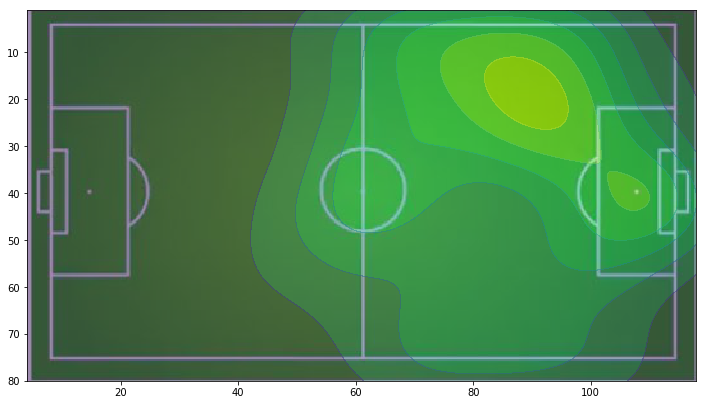

In [30]:
## Heat Map of Christiano Ronaldo
run=pd.read_sql('select * from player_3_mid6;', con=connection)
pos1=run.set_index(['player'])
pos1.loc['Samuel Yves Umtiti']
pos2=pos1.iloc[:,1:4]
pos2.loc['Abdullah Ibrahim Al Maiouf']

name='Cristiano Ronaldo dos Santos Aveiro'

from scipy.stats.kde import gaussian_kde
x=pd.to_numeric(pos2.loc[name]['location0'])
y=pd.to_numeric(pos2.loc[name]['location1'])

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size*0.5*1j,y.min():y.max():y.size*0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,15))
# ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
# ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5)
ax2.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)

# ax1.set_xlim(x.min(), x.max())
# ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.max(), y.min())

# you can also overlay your soccer field
im = plt.imread('soccerPitch.jpg')
# ax1.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
ax2.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
print('\x1b[1;30m'+'Heat Map of Christiano Ronaldo'+'\x1b[0m')
print()
plt.show()

In [1]:
## Heat Map of Eden Hazard
run=pd.read_sql('select * from player_3_mid6;', con=connection)
pos1=run.set_index(['player'])
pos1.loc['Samuel Yves Umtiti']
pos2=pos1.iloc[:,1:4]
pos2.loc['Abdullah Ibrahim Al Maiouf']

name='Eden Hazard'

from scipy.stats.kde import gaussian_kde
x=pd.to_numeric(pos2.loc[name]['location0'])
y=pd.to_numeric(pos2.loc[name]['location1'])

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size*0.5*1j,y.min():y.max():y.size*0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,15))
# ax1 = fig.add_subplot(211)
# ax4 = fig.add_subplot(212)
ax5 = fig.add_subplot(212)

# alpha=0.5 will make the plots semitransparent
# ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), alpha=0.5)
# ax4.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)
ax5.contourf(xi, yi, zi.reshape(xi.shape), alpha=0.5)

# ax1.set_xlim(x.min(), x.max())
# ax1.set_ylim(y.min(), y.max())
ax5.set_xlim(x.min(), x.max())
ax5.set_ylim(y.max(), y.min())

# you can also overlay your soccer field
im = plt.imread('soccerPitch.jpg')
# ax1.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
# ax4.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
ax5.imshow(im, extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto')
print('\x1b[1;32m'+'Heat Map of Eden Hazard'+'\x1b[0m')
print()
plt.show()

NameError: name 'pd' is not defined

#### Dashboard

In [48]:
import plotly.dashboard_objs as dashboard
import IPython.display
from IPython.display import Image
soccer_dash = dashboard.Dashboard()

In [49]:
# Row 1
box_a = {
    'type': 'box',
    'boxType': 'plot',
    'fileId': 'asahay:0',
    'title': 'Team Ranks: Before and After'
}

box_b = {
    'type': 'box',
    'boxType': 'plot',
#     'fileId': 'sharma.ismd:31',
    'fileId': 'asahay:2',
    'title': 'Journey through the World Cup'
}

# Row 2
box_c = {
    'type': 'box',
    'boxType': 'plot',
#     'fileId': 'sharma.ismd:13',
    'fileId': 'asahay:4',
    'title': 'Distance per goal (Team Work Rate)'
}

box_d = {
    'type': 'box',
    'boxType': 'plot',
#     'fileId': 'sharma.ismd:25',
    'fileId': 'asahay:6',
    'title': 'Passes per goal (Playing Style)'
}

# Row 3
box_e = {
    'type': 'box',
    'boxType': 'plot',
#     'fileId': 'sharma.ismd:35',
    'fileId': 'asahay:8',
    'title': 'Team Diagnostics'
}

box_f = {
    'type': 'box',
    'boxType': 'plot',
#     'fileId': 'sharma.ismd:27',
    'fileId': 'asahay:10',
    'title': 'Strikers'
}

# Row 4
box_g = {
    'type': 'box',
    'boxType': 'plot',
#     'fileId': 'sharma.ismd:37',
    'fileId': 'asahay:12',
    'title': 'Mid-fielders'
}

box_h = {
    'type': 'box',
    'boxType': 'plot',
#     'fileId': 'sharma.ismd:37',
    'fileId': 'asahay:14',
    'title': 'Defenders'
}

# text_for_box = """ 
# ## Distributions: 


# #### Scatter Plot
# 1. Ranging 0 - 500
# 2. Even distribution

# #### Box Plot
# 1. Similar Range
# 2. Outliers present in trace 1 and trace 3

# You can view more markdown tips [here](https://daringfireball.net/projects/markdown/syntax).
# """

# box_c = {
#     'type': 'box',
#     'boxType': 'text',
#     'text': text_for_box,
#     'title': 'Markdown Options for Text Box'
# }
# soccer_dash.insert(box_a, 'right', 2)
# soccer_dash.remove(1)
#my_dboard.insert(box_b)

In [50]:
soccer_dash.insert(box_a)
soccer_dash.insert(box_c, 'below', 1, fill_percent = 80)
soccer_dash.insert(box_e, 'below', 2, fill_percent = 75)
soccer_dash.insert(box_g, 'below', 3, fill_percent = 67)
soccer_dash.insert(box_h, 'below', 4, fill_percent = 50)
soccer_dash.insert(box_b, 'right', 1, fill_percent = 50)
soccer_dash.insert(box_d, 'right', 3, fill_percent = 50)
soccer_dash.insert(box_f, 'right', 5, fill_percent = 50)


In [51]:
# soccer_dash.get_preview()
# py.dashboard_ops.get_dashboard_names()
soccer_dash['settings']['title'] = 'FIFA WC 2018: Inside Out' # Title

In [53]:
import plotly.plotly as py
py.dashboard_ops.upload(soccer_dash, 'European Soccer Dataset')

'https://plot.ly/~asahay/16/fifa-wc-2018-inside-out/'